In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Alzheimer

In [2]:
alz_classif = pd.read_excel('summary_results.xlsx', sheet_name='alzheimer classif')
alz_metrics = pd.read_excel('summary_results.xlsx', sheet_name='alzheimer best metrics')
alz_metrics['batch_entropy mean'] = (np.log(21) - alz_metrics['batch_entropy mean'])/np.log(21)
alz_metrics['qc_aPCC mean'] = 1 - alz_metrics['qc_aPCC mean']


In [3]:
alz_metrics

,model name,batch_entropy mean,batch_entropy std,adjusted_rand_score mean,adjusted_rand_score std,adjusted_mutual_info_score mean,adjusted_mutual_info_score std,qc_dist/total_dist mean,qc_dist/total_dist std,qc_aPCC mean,qc_aPCC std
0,raw,0.351702,0.000000,0.042420,0.000000,0.134557,0.000000,1.049893,0.000000,0.346903,0.000000
1,minmax,0.358715,0.000000,0.035962,0.000000,0.168424,0.000000,0.955373,0.000000,0.445971,0.000000
2,minmax_per_batch,0.343212,0.000000,0.108159,0.000000,0.240812,0.000000,3.261474,0.000000,0.828587,0.000000
3,standard,0.353553,0.000000,0.025110,0.000000,0.114335,0.000000,0.822470,0.000000,0.671371,0.000000
4,standard_per_batch,0.263390,0.000000,0.007280,0.000000,0.031370,0.000000,3.582448,0.000000,0.774485,0.000000
5,robust,0.360752,0.000000,0.045668,0.000000,0.154156,0.000000,1.137376,0.000000,0.804810,0.000000
6,robust_per_batch,0.278555,0.000000,-0.000805,0.000000,0.010397,0.000000,1.747916,0.000000,0.803554,0.000000
7,combat,0.232385,0.000000,0.001292,0.000000,0.000951,0.000000,0.958292,0.000000,1.018158,0.000000
8,pycombat,0.318819,0.000000,0.010479,0.000000,0.025512,0.000000,0.871237,0.000000,0.227837,0.000000
9,harmony,0.225735,0.000000,-0.005456,0.000000,-0.014437,0.000000,0.765994,0.000000,0.965680,0.000000


In [4]:
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": alz_classif['valid/mcc_mean'],
    "sd" : alz_classif['valid/mcc_std'],
    "models": alz_classif['model name'],
    "group": ['valid' for _ in range(len(alz_classif['model name']))]
})
df = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['batch_entropy mean'], alz_metrics['adjusted_rand_score mean'], alz_metrics['adjusted_mutual_info_score mean'], alz_metrics['qc_dist/total_dist mean'], alz_metrics['qc_aPCC mean'])),
    "sd": pd.concat((alz_metrics['batch_entropy std'], alz_metrics['adjusted_rand_score std'], alz_metrics['adjusted_mutual_info_score std'], alz_metrics['qc_dist/total_dist std'], alz_metrics['qc_aPCC std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['nBE' for _ in range(len(alz_metrics['model name']))] + ['ARI' for _ in range(len(alz_metrics['model name']))] + ['AMI' for _ in range(len(alz_metrics['model name']))] + ['qc_dist/total_dist' for _ in range(len(alz_metrics['model name']))] + ['qc_aPCC' for _ in range(len(alz_metrics['model name']))]
})
df_be_ami_ari = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['batch_entropy mean'], alz_metrics['adjusted_rand_score mean'], alz_metrics['adjusted_mutual_info_score mean'])),
    "sd": pd.concat((alz_metrics['batch_entropy std'], alz_metrics['adjusted_rand_score std'], alz_metrics['adjusted_mutual_info_score std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['Batch Entropy' for _ in range(len(alz_metrics['model name']))] + ['ARI' for _ in range(len(alz_metrics['model name']))] + ['AMI' for _ in range(len(alz_metrics['model name']))]
})
df_dist_apcc = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['qc_dist/total_dist mean'], alz_metrics['qc_aPCC mean'])),
    "sd": pd.concat((alz_metrics['qc_dist/total_dist std'], alz_metrics['qc_aPCC std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['qc_dist/total_dist' for _ in range(len(alz_metrics['model name']))] + ['qc_aPCC' for _ in range(len(alz_metrics['model name']))]
})
df_be = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['batch_entropy mean'],
    "sd" : alz_metrics['batch_entropy std'],
    "models": alz_metrics['model name'],
    "metrics": ['nBE' for _ in range(len(alz_metrics['model name']))]
})
df_ari = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['adjusted_rand_score mean'],
    "sd" : alz_metrics['adjusted_rand_score std'],
    "models": alz_metrics['model name'],
    "metrics": ['ARI' for _ in range(len(alz_metrics['model name']))]
})
df_ami = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['adjusted_mutual_info_score mean'],
    "sd" : alz_metrics['adjusted_mutual_info_score std'],
    "models": alz_metrics['model name'],
    "metrics": ['AMI' for _ in range(len(alz_metrics['model name']))]
})
df_dist = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['qc_dist/total_dist mean'],
    "sd" : alz_metrics['qc_dist/total_dist std'],
    "models": alz_metrics['model name'],
    "metrics": ['qc_dist/total_dist' for _ in range(len(alz_metrics['model name']))]
})
df_qc_aPCC = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['qc_aPCC mean'],
    "sd" : alz_metrics['qc_aPCC std'],
    "models": alz_metrics['model name'],
    "metrics": ['qc_aPCC' for _ in range(len(alz_metrics['model name']))]
})
lolims = [True for _ in range(len(df_be['metrics']))]

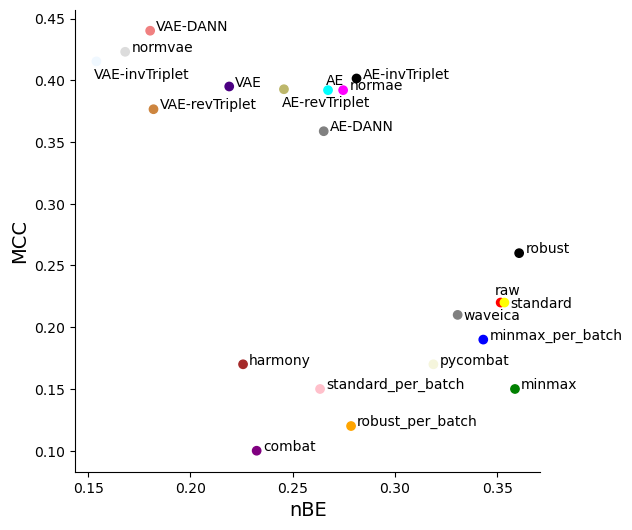

In [5]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_be['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax.set_xlabel('nBE', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(alz_metrics['model name']):
    x = df_be['average'][i] + 0.003
    y = df_valid['mcc'][i]
    if txt == 'raw':
        y += 0.006
        x -= 0.006
    elif txt == 'standard':
        y -= 0.004
    elif txt == 'AE-revTriplet':
        y -= 0.014
        x -= 0.004
    elif txt == 'VAE-invTriplet':
        y -= 0.014
        x -= 0.004
    elif txt == 'AE':
        y += 0.004
        x -= 0.004
    elif txt == 'waveica':
        y -= 0.004
    ax.annotate(txt, (x, y))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 9}

matplotlib.rc('font', **font)
    
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


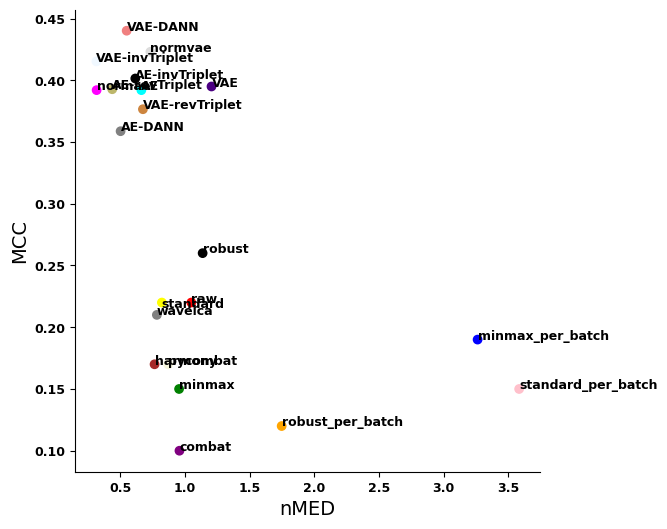

In [6]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_dist['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax.set_xlabel('nMED', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(alz_metrics['model name']):
    x = df_dist['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'standard':
        y -= 0.004
    ax.annotate(txt, (x, y))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 9}

matplotlib.rc('font', **font)
# matplotlib.rc('xtick', labelsize=32) 
# matplotlib.rc('ytick', labelsize=32) 
    
plt.show()

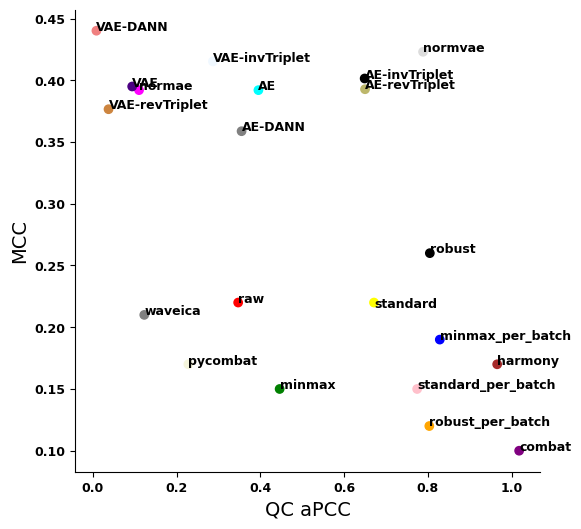

In [7]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_qc_aPCC['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax.set_xlabel('QC aPCC', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(alz_metrics['model name']):
    x = df_qc_aPCC['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'standard':
        y -= 0.004
    ax.annotate(txt, (x, y))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 9}

matplotlib.rc('font', **font)
# matplotlib.rc('xtick', labelsize=32) 
# matplotlib.rc('ytick', labelsize=32) 
    
plt.show()

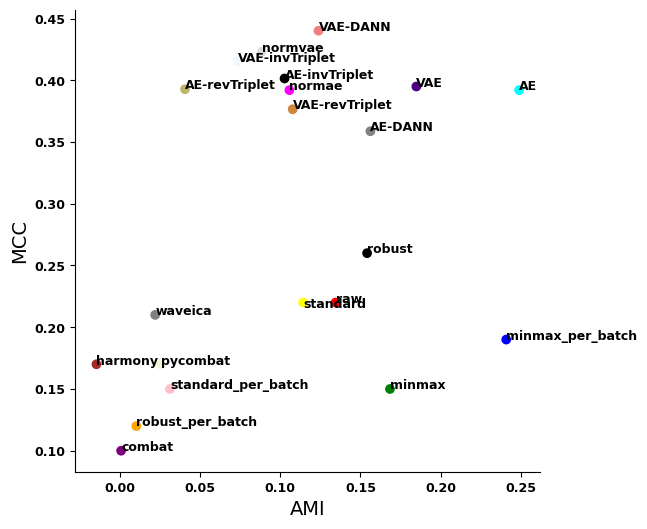

In [8]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_ami['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax.set_xlabel('AMI', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(alz_metrics['model name']):
    x = df_ami['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'standard':
        y -= 0.004
    ax.annotate(txt, (x, y))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 9}

matplotlib.rc('font', **font)
# matplotlib.rc('xtick', labelsize=32) 
# matplotlib.rc('ytick', labelsize=32) 
    
plt.show()

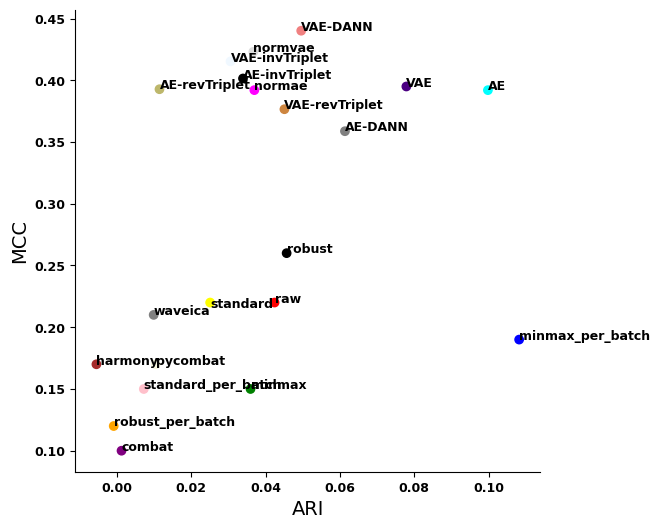

In [9]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_ari['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax.set_xlabel('ARI', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(alz_metrics['model name']):
    x = df_ari['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'standard':
        y -= 0.004
    ax.annotate(txt, (x, y))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 9}

matplotlib.rc('font', **font)
# matplotlib.rc('xtick', labelsize=32) 
# matplotlib.rc('ytick', labelsize=32) 
    
plt.show()

# Amide

In [10]:
alz_classif = pd.read_excel('summary_results.xlsx', sheet_name='amide classif')
alz_metrics = pd.read_excel('summary_results.xlsx', sheet_name='amide best metrics')
alz_metrics['batch_entropy mean'] = (np.log(3) - alz_metrics['batch_entropy mean'])/np.log(3)
alz_metrics['qc_aPCC mean'] = 1 - alz_metrics['qc_aPCC mean']


In [11]:
alz_metrics

,model name,batch_entropy mean,batch_entropy std,adjusted_rand_score mean,adjusted_rand_score std,adjusted_mutual_info_score mean,adjusted_mutual_info_score std,qc_dist/total_dist mean,qc_dist/total_dist std,qc_aPCC mean,qc_aPCC std,Unnamed: 11,Unnamed: 12,adjusted_mutual_info_score mean.1,qc_dist/total_dist mean.1,batch_entropy mean.1,valid/mcc_mean
0,raw,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.838954,0.000000,0.184585,0.000000,NaN,NaN,1.000000,0.838954,0.000000,0.920000
1,minmax,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.902304,0.000000,0.519836,0.000000,NaN,NaN,1.000000,0.902304,0.000000,0.940000
2,minmax_per_batch,0.999682,0.000000,1.000000,0.000000,1.000000,0.000000,0.967037,0.000000,0.674074,0.000000,NaN,NaN,1.000000,0.967037,0.000349,0.930000
3,standard,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.913505,0.000000,0.817210,0.000000,NaN,NaN,1.000000,0.913505,0.000000,0.920000
4,standard_per_batch,0.631387,0.000000,0.942709,0.000000,0.913184,0.000000,0.961342,0.000000,0.760304,0.000000,NaN,NaN,0.913184,0.961342,0.404963,0.920000
5,robust,0.989581,0.000000,1.000000,0.000000,1.000000,0.000000,0.881791,0.000000,0.689737,0.000000,NaN,NaN,1.000000,0.881791,0.011446,0.890000
6,robust_per_batch,0.507241,0.000000,0.737838,0.000000,0.703037,0.000000,1.035938,0.000000,0.639029,0.000000,NaN,NaN,0.703037,1.035938,0.541351,0.830000
7,combat,0.188476,0.000000,0.002520,0.000000,0.004428,0.000000,1.181689,0.000000,0.991345,0.000000,NaN,NaN,0.004428,1.181689,0.891550,0.050000
8,pycombat,0.707577,0.000000,0.075338,0.000000,0.266585,0.000000,0.793879,0.000000,0.056920,0.000000,NaN,NaN,0.266585,0.793879,0.321259,0.920000
9,harmony,0.475959,0.000000,0.994752,0.000000,0.989972,0.000000,0.995316,0.000000,0.821382,0.000000,NaN,NaN,0.989972,0.995316,0.575718,0.130000


In [12]:
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": alz_classif['valid/mcc_mean'],
    "sd" : alz_classif['valid/mcc_std'],
    "models": alz_classif['model name'],
    "group": ['valid' for _ in range(len(alz_classif['model name']))]
})
df = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['batch_entropy mean'], alz_metrics['adjusted_rand_score mean'], alz_metrics['adjusted_mutual_info_score mean'], alz_metrics['qc_dist/total_dist mean'], alz_metrics['qc_aPCC mean'])),
    "sd": pd.concat((alz_metrics['batch_entropy std'], alz_metrics['adjusted_rand_score std'], alz_metrics['adjusted_mutual_info_score std'], alz_metrics['qc_dist/total_dist std'], alz_metrics['qc_aPCC std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['nBE' for _ in range(len(alz_metrics['model name']))] + ['ARI' for _ in range(len(alz_metrics['model name']))] + ['AMI' for _ in range(len(alz_metrics['model name']))] + ['qc_dist/total_dist' for _ in range(len(alz_metrics['model name']))] + ['qc_aPCC' for _ in range(len(alz_metrics['model name']))]
})
df_be_ami_ari = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['batch_entropy mean'], alz_metrics['adjusted_rand_score mean'], alz_metrics['adjusted_mutual_info_score mean'])),
    "sd": pd.concat((alz_metrics['batch_entropy std'], alz_metrics['adjusted_rand_score std'], alz_metrics['adjusted_mutual_info_score std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['Batch Entropy' for _ in range(len(alz_metrics['model name']))] + ['ARI' for _ in range(len(alz_metrics['model name']))] + ['AMI' for _ in range(len(alz_metrics['model name']))]
})
df_dist_apcc = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['qc_dist/total_dist mean'], alz_metrics['qc_aPCC mean'])),
    "sd": pd.concat((alz_metrics['qc_dist/total_dist std'], alz_metrics['qc_aPCC std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['qc_dist/total_dist' for _ in range(len(alz_metrics['model name']))] + ['qc_aPCC' for _ in range(len(alz_metrics['model name']))]
})
df_be = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['batch_entropy mean'],
    "sd" : alz_metrics['batch_entropy std'],
    "models": alz_metrics['model name'],
    "metrics": ['nBE' for _ in range(len(alz_metrics['model name']))]
})
df_ari = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['adjusted_rand_score mean'],
    "sd" : alz_metrics['adjusted_rand_score std'],
    "models": alz_metrics['model name'],
    "metrics": ['ARI' for _ in range(len(alz_metrics['model name']))]
})
df_ami = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['adjusted_mutual_info_score mean'],
    "sd" : alz_metrics['adjusted_mutual_info_score std'],
    "models": alz_metrics['model name'],
    "metrics": ['AMI' for _ in range(len(alz_metrics['model name']))]
})
df_dist = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['qc_dist/total_dist mean'],
    "sd" : alz_metrics['qc_dist/total_dist std'],
    "models": alz_metrics['model name'],
    "metrics": ['qc_dist/total_dist' for _ in range(len(alz_metrics['model name']))]
})
df_qc_aPCC = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['qc_aPCC mean'],
    "sd" : alz_metrics['qc_aPCC std'],
    "models": alz_metrics['model name'],
    "metrics": ['qc_aPCC' for _ in range(len(alz_metrics['model name']))]
})
lolims = [True for _ in range(len(df_be['metrics']))]

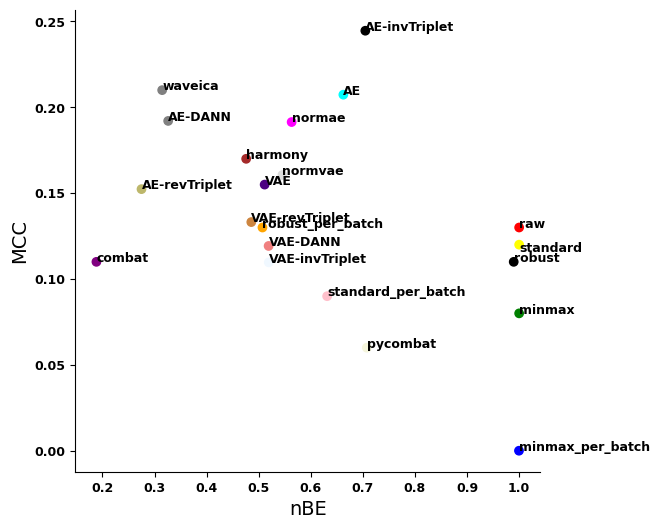

In [13]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_be['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax.set_xlabel('nBE', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(alz_metrics['model name']):
    x = df_be['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'standard':
        y -= 0.004
    ax.annotate(txt, (x, y))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 9}

matplotlib.rc('font', **font)
# matplotlib.rc('xtick', labelsize=32) 
# matplotlib.rc('ytick', labelsize=32) 
    
plt.show()

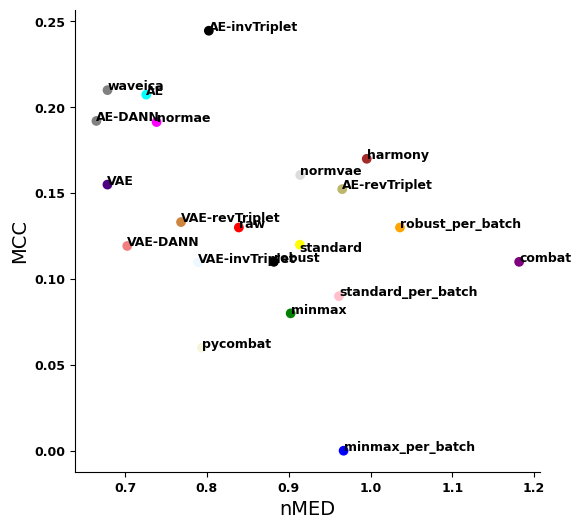

In [14]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_dist['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax.set_xlabel('nMED', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(alz_metrics['model name']):
    x = df_dist['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'standard':
        y -= 0.004
    ax.annotate(txt, (x, y))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 9}

matplotlib.rc('font', **font)
# matplotlib.rc('xtick', labelsize=32) 
# matplotlib.rc('ytick', labelsize=32) 
    
plt.show()

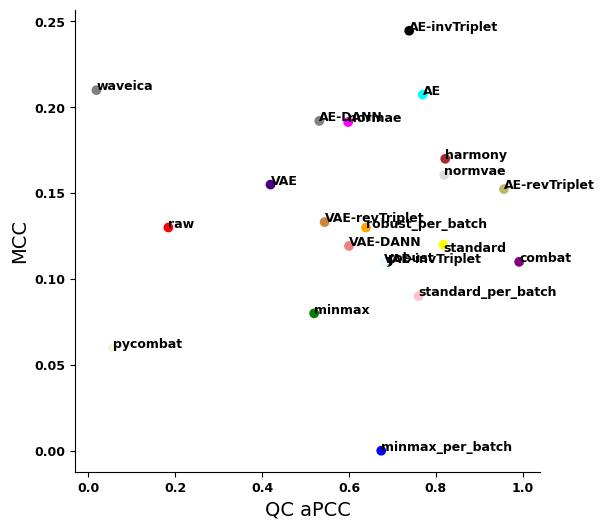

In [15]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_qc_aPCC['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax.set_xlabel('QC aPCC', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(alz_metrics['model name']):
    x = df_qc_aPCC['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'standard':
        y -= 0.004
    ax.annotate(txt, (x, y))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 9}

matplotlib.rc('font', **font)
# matplotlib.rc('xtick', labelsize=32) 
# matplotlib.rc('ytick', labelsize=32) 
    
plt.show()

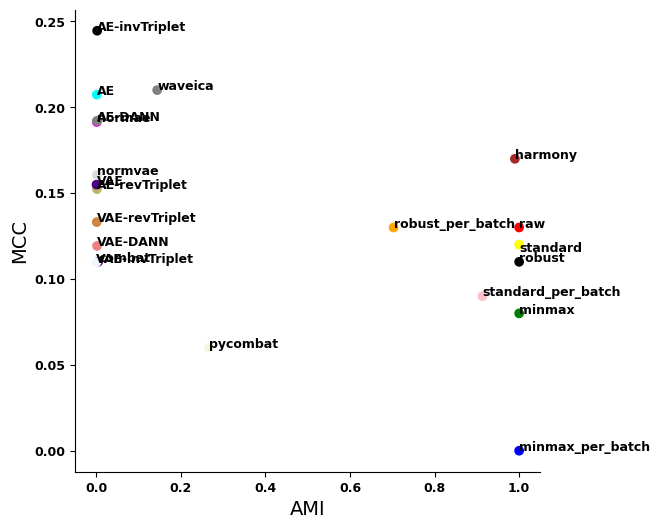

In [16]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_ami['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax.set_xlabel('AMI', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(alz_metrics['model name']):
    x = df_ami['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'standard':
        y -= 0.004
    ax.annotate(txt, (x, y))
font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 7}

matplotlib.rc('font', **font)
# matplotlib.rc('xtick', labelsize=32) 
# matplotlib.rc('ytick', labelsize=32) 
    
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


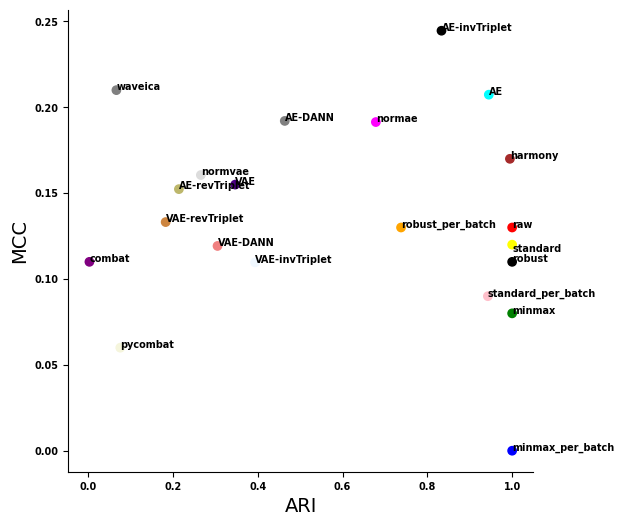

In [17]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_ari['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax.set_xlabel('ARI', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(alz_metrics['model name']):
    x = df_ari['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'standard':
        y -= 0.004
    ax.annotate(txt, (x, y))
font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 7}

matplotlib.rc('font', **font)
# matplotlib.rc('xtick', labelsize=32) 
# matplotlib.rc('ytick', labelsize=32) 
    
plt.show()

# Mice

In [18]:
alz_classif = pd.read_excel('summary_results.xlsx', sheet_name='mice classif')
alz_metrics = pd.read_excel('summary_results.xlsx', sheet_name='mice best metrics')
alz_metrics['batch_entropy mean'] = (np.log(7) - alz_metrics['batch_entropy mean'])/np.log(3)


In [19]:
alz_metrics

,model name,batch_entropy mean,batch_entropy std,adjusted_rand_score mean,adjusted_rand_score std,adjusted_mutual_info_score mean,adjusted_mutual_info_score std
0,raw,1.550240,0.000000,0.783630,0.000000,0.818056,0.000000
1,minmax,1.557041,0.000000,0.809809,0.000000,0.835449,0.000000
2,minmax_per_batch,1.548289,0.000000,0.749553,0.000000,0.791972,0.000000
3,standard,1.441132,0.000000,0.735547,0.000000,0.779283,0.000000
4,standard_per_batch,0.705003,0.000000,0.014476,0.000000,0.051643,0.000000
5,robust,1.290185,0.000000,0.261142,0.000000,0.518879,0.000000
6,robust_per_batch,1.337264,0.000000,-0.004012,0.000000,0.008826,0.000000
7,combat,0.409731,0.000000,-0.002361,0.000000,-0.002861,0.000000
8,pycombat,0.615040,0.000000,-0.001333,0.000000,0.003963,0.000000
9,harmony,0.132278,0.000000,0.049053,0.000000,0.078964,0.000000


In [20]:
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": alz_classif['valid/mcc_mean'],
    "sd" : alz_classif['valid/mcc_std'],
    "models": alz_classif['model name'],
    "group": ['valid' for _ in range(len(alz_classif['model name']))]
})
df = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['batch_entropy mean'], alz_metrics['adjusted_rand_score mean'], alz_metrics['adjusted_mutual_info_score mean'])),
    "sd": pd.concat((alz_metrics['batch_entropy std'], alz_metrics['adjusted_rand_score std'], alz_metrics['adjusted_mutual_info_score std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['nBE' for _ in range(len(alz_metrics['model name']))] + ['ARI' for _ in range(len(alz_metrics['model name']))] + ['AMI' for _ in range(len(alz_metrics['model name']))]
})
df_ami_ari = pd.DataFrame({
    # "channel": channel,
    "average": pd.concat((alz_metrics['adjusted_rand_score mean'], alz_metrics['adjusted_mutual_info_score mean'])),
    "sd": pd.concat((alz_metrics['adjusted_rand_score std'], alz_metrics['adjusted_mutual_info_score std'])),
    "models": pd.concat((alz_metrics['model name'], alz_metrics['model name'])),
    "metrics": ['ARI' for _ in range(len(alz_metrics['model name']))] + ['AMI' for _ in range(len(alz_metrics['model name']))]
})
df_be = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['batch_entropy mean'],
    "sd" : alz_metrics['batch_entropy std'],
    "models": alz_metrics['model name'],
    "metrics": ['nBE' for _ in range(len(alz_metrics['model name']))]
})
df_ari = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['adjusted_rand_score mean'],
    "sd" : alz_metrics['adjusted_rand_score std'],
    "models": alz_metrics['model name'],
    "metrics": ['ARI' for _ in range(len(alz_metrics['model name']))]
})
df_ami = pd.DataFrame({
    # "channel": channel,
    "average": alz_metrics['adjusted_mutual_info_score mean'],
    "sd" : alz_metrics['adjusted_mutual_info_score std'],
    "models": alz_metrics['model name'],
    "metrics": ['AMI' for _ in range(len(alz_metrics['model name']))]
})
lolims = [True for _ in range(len(df_be['metrics']))]

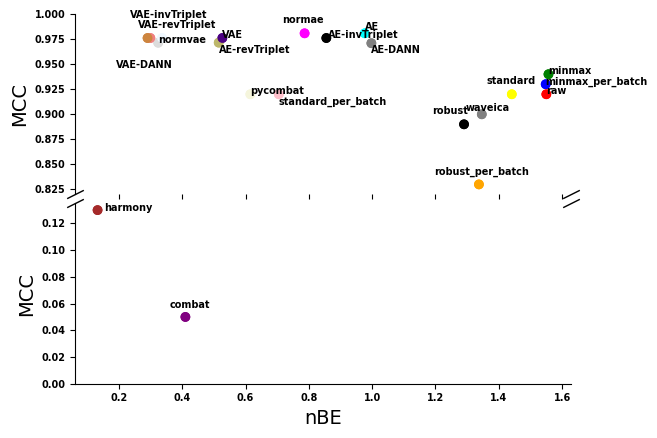

In [43]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.scatter(df_be['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax2.scatter(df_be['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.82, 1.)  # outliers only
ax2.set_ylim(0, .135)  # most of the data

ax1.scatter(df_be['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax1.set_xlabel('nBE', fontsize=14)
ax1.set_ylabel('MCC', fontsize=14)
for c, (i, txt) in enumerate(zip(list(alz_metrics['model name'].index), alz_metrics['model name'])):
    x = df_be['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'standard':
        y += 0.01
        x -= 0.08
    if txt == 'raw':
        y += 0.0
        x -= 0.0
    if txt == 'AE':
        y += 0.003
        x -= 0.0
    if txt == 'VAE-invTriplet':
        y += 0.02
        x -= 0.10
    if txt == 'AE-invTriplet':
        y -= 0.00
        x += 0.004
    if txt == 'AE-revTriplet':
        y -= 0.01
        x -= 0.00
    if txt == 'robust_per_batch':
        y += 0.01
        x -= 0.14
    if txt == 'standard_per_batch':
        y -= 0.01
        x -= 0.0
    if txt == 'waveica':
        y += 0.003
        x -= 0.05
    if txt == 'robust':
        y += 0.01
        x -= 0.1
    if txt == 'normae':
        y += 0.01
        x -= 0.07
    if txt == 'AE-DANN':
        y -= 0.01
        x += 0.0
    if txt == 'VAE-DANN':
        y -= 0.03
        x -= 0.11
    if txt == 'VAE-revTriplet':
        y += 0.01
        x -= 0.03
    ax1.annotate(txt, (x, y))
ax2.scatter(df_be['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax2.set_xlabel('nBE', fontsize=14)
ax2.set_ylabel('MCC', fontsize=14)
for c, (i, txt) in enumerate(zip(list(alz_metrics['model name'].index), alz_metrics['model name'])):
    x = df_be['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'combat':
        y += 0.007
        x -= 0.05
    if txt == 'harmony':
        y -= 0.001
        x += 0.02
    ax2.annotate(txt, (x, y))
font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 7}

matplotlib.rc('font', **font)

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    
plt.show()

'\nd = .5  # proportion of vertical to horizontal extent of the slanted line\nkwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,\n              linestyle="none", color=\'k\', mec=\'k\', mew=1, clip_on=False)\nax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)\nax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)\n    \nplt.show()\n'

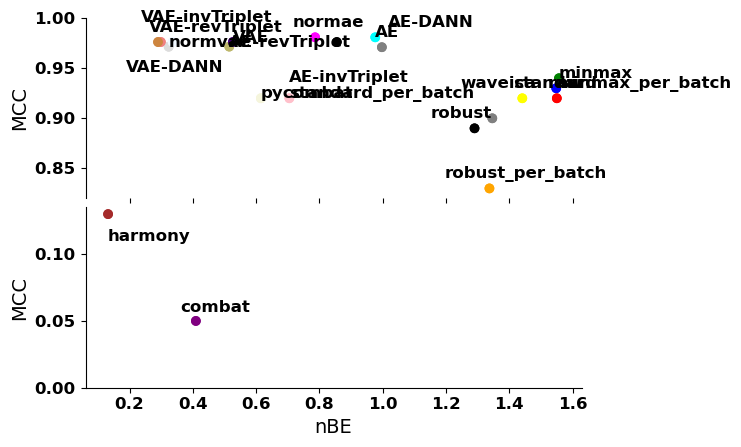

In [33]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.scatter(df_be['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax2.scatter(df_be['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.82, 1.)  # outliers only
ax2.set_ylim(0, .135)  # most of the data

ax1.scatter(df_be['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax1.set_xlabel('nBE', fontsize=14)
ax1.set_ylabel('MCC', fontsize=14)
for c, (i, txt) in enumerate(zip(list(alz_metrics['model name'].index), alz_metrics['model name'])):
    x = df_be['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'standard':
        y += 0.01
        x -= 0.03
    if txt == 'raw':
        y += 0.01
        x -= 0.03
    if txt == 'VAE-invTriplet':
        y += 0.02
        x -= 0.10
    if txt == 'AE-invTriplet':
        y -= 0.04
        x -= 0.15
    if txt == 'robust_per_batch':
        y += 0.01
        x -= 0.14
    if txt == 'waveica':
        y += 0.03
        x -= 0.1
    if txt == 'robust':
        y += 0.01
        x -= 0.14
    if txt == 'normae':
        y += 0.01
        x -= 0.07
    if txt == 'AE-DANN':
        y += 0.02
        x += 0.02
    if txt == 'VAE-DANN':
        y -= 0.03
        x -= 0.11
    if txt == 'VAE-revTriplet':
        y += 0.01
        x -= 0.03
    ax1.annotate(txt, (x, y))
ax2.scatter(df_be['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax2.set_xlabel('nBE', fontsize=14)
ax2.set_ylabel('MCC', fontsize=14)
for c, (i, txt) in enumerate(zip(list(alz_metrics['model name'].index), alz_metrics['model name'])):
    x = df_be['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'combat':
        y += 0.007
        x -= 0.05
    if txt == 'harmony':
        y -= 0.02
        x += 0.0
    ax2.annotate(txt, (x, y))
# font = {'family' : 'normal',
#         # 'weight' : 'bold',
#         'size'   : 12}

matplotlib.rc('font', **font)

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

"""
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    
plt.show()
"""

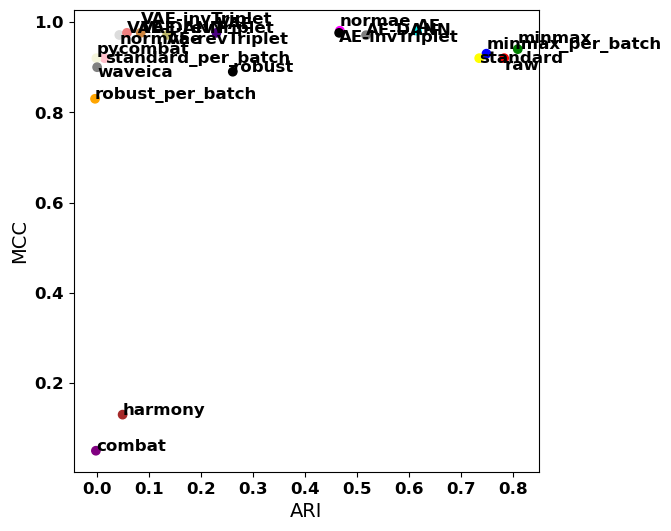

In [23]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_ari['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax.set_xlabel('ARI', fontsize=14)
ax.set_ylabel('MCC', fontsize=14)
for i, txt in enumerate(alz_metrics['model name']):
    x = df_ari['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'normvae':
        y -= 0.02
    if txt == 'VAE':
        y += 0.01
    if txt == 'raw':
        y -= 0.025
    if txt == 'minmax':
        y += 0.015
    if txt == 'minmax_per_batch':
        y += 0.01
    if txt == 'waveica':
        y -= 0.02
    if txt == 'pycombat':
        y += 0.01
    if txt == 'standard':
        y -= 0.01
    if txt == 'standard_per_batch':
        y -= 0.01
    if txt == 'normae':
        y += 0.01
    if txt == 'AE-invTriplet':
        y -= 0.02
    if txt == 'AE-revTriplet':
        y -= 0.02
    if txt == 'VAE-invTriplet':
        y += 0.02
    ax.annotate(txt, (x, y))
font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 7}

matplotlib.rc('font', **font)
# matplotlib.rc('xtick', labelsize=32) 
# matplotlib.rc('ytick', labelsize=32) 
    
plt.show()

In [24]:
txt

'VAE-revTriplet'

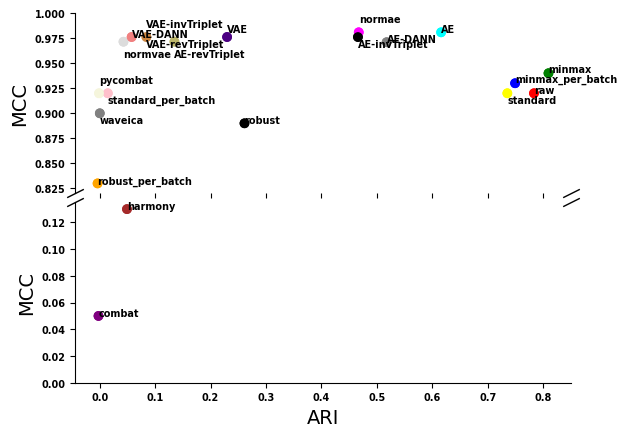

In [25]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.scatter(df_ari['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax2.scatter(df_ari['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.82, 1.)  # outliers only
ax2.set_ylim(0, .135)  # most of the data

ax1.scatter(df_ari['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax1.set_xlabel('Adjusted Mutual Information (ARI)', fontsize=14)
ax1.set_ylabel('MCC', fontsize=14)
for i, txt in enumerate(alz_metrics['model name']):
    x = df_ari['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'normvae':
        y -= 0.015
    if txt == 'VAE':
        y += 0.005
    if txt == 'raw':
        y -= 0.0
    if txt == 'minmax':
        y += 0.0015
    if txt == 'minmax_per_batch':
        y += 0.001
    if txt == 'waveica':
        y -= 0.01
    if txt == 'pycombat':
        y += 0.01
    if txt == 'standard':
        y -= 0.01
    if txt == 'standard_per_batch':
        y -= 0.01
    if txt == 'normae':
        y += 0.01
    if txt == 'AE-invTriplet':
        y -= 0.01
    if txt == 'AE-revTriplet':
        y -= 0.015
    if txt == 'VAE-invTriplet':
        y += 0.01
    if txt == 'VAE-revTriplet':
        y -= 0.01
    ax1.annotate(txt, (x, y))
ax2.scatter(df_ari['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax2.set_xlabel('ARI', fontsize=14)
ax2.set_ylabel('MCC', fontsize=14)
for i, txt in enumerate(alz_metrics['model name']):
    x = df_ari['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'normvae':
        y -= 0.02
    if txt == 'VAE':
        y += 0.01
    if txt == 'raw':
        y -= 0.01
    if txt == 'minmax':
        y += 0.015
    if txt == 'minmax_per_batch':
        y += 0.01
    if txt == 'waveica':
        y -= 0.01
    if txt == 'pycombat':
        y += 0.01
    if txt == 'standard':
        y -= 0.01
    if txt == 'standard_per_batch':
        y -= 0.01
    if txt == 'normae':
        y += 0.01
    if txt == 'AE-invTriplet':
        y -= 0.01
    if txt == 'AE-revTriplet':
        y -= 0.02
    if txt == 'VAE-invTriplet':
        y += 0.01
    ax2.annotate(txt, (x, y))
font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 7}

matplotlib.rc('font', **font)

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


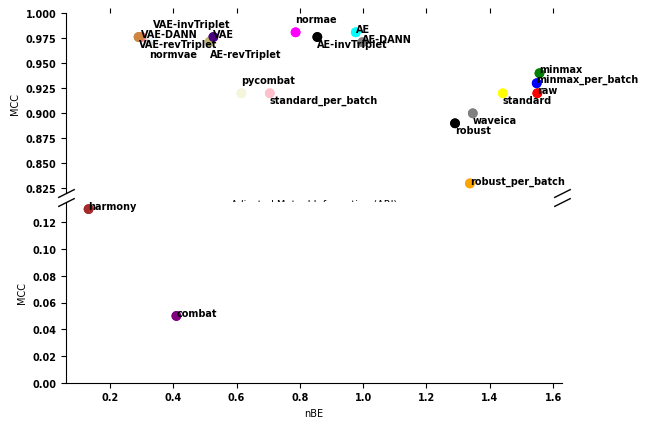

In [26]:
N = len(alz_metrics['model name'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", 
                   'grey', 'black', 'darkkhaki', 'indigo', 'gainsboro', 'lightcoral', 'aliceblue', 'peru'])
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.scatter(df_be['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax2.scatter(df_be['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.82, 1.)  # outliers only
ax2.set_ylim(0, .135)  # most of the data

ax1.scatter(df_be['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax1.set_xlabel('Adjusted Mutual Information (ARI)')
ax1.set_ylabel('MCC')
for i, txt in enumerate(alz_metrics['model name']):
    x = df_be['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'normvae':
        y -= 0.015
    if txt == 'VAE':
        y += 0.00
    if txt == 'raw':
        y -= 0.0
    if txt == 'minmax':
        y += 0.0015
    if txt == 'robust':
        y -= 0.01
    if txt == 'minmax_per_batch':
        y += 0.001
    if txt == 'waveica':
        y -= 0.01
    if txt == 'pycombat':
        y += 0.01
    if txt == 'standard':
        y -= 0.01
    if txt == 'standard_per_batch':
        y -= 0.01
    if txt == 'normae':
        y += 0.01
    if txt == 'AE-invTriplet':
        y -= 0.01
    if txt == 'AE-revTriplet':
        y -= 0.015
    if txt == 'VAE-invTriplet':
        y += 0.01
    if txt == 'VAE-revTriplet':
        y -= 0.01
    ax1.annotate(txt, (x, y))
ax2.scatter(df_be['average'], df_valid['mcc'], 
           # c=np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]), cmap='gist_rainbow')
           c=colors)
ax2.set_xlabel('nBE')
ax2.set_ylabel('MCC')
for i, txt in enumerate(alz_metrics['model name']):
    x = df_be['average'][i]
    y = df_valid['mcc'][i]
    if txt == 'normvae':
        y -= 0.02
    if txt == 'VAE':
        y += 0.001
    if txt == 'raw':
        y -= 0.01
    if txt == 'minmax':
        y += 0.015
    if txt == 'robust':
        y -= 0.01
    if txt == 'minmax_per_batch':
        y += 0.01
    if txt == 'waveica':
        y -= 0.01
    if txt == 'pycombat':
        y += 0.01
    if txt == 'standard':
        y -= 0.01
    if txt == 'standard_per_batch':
        y -= 0.01
    if txt == 'normae':
        y += 0.01
    if txt == 'AE-invTriplet':
        y -= 0.01
    if txt == 'AE-revTriplet':
        y -= 0.02
    if txt == 'VAE-invTriplet':
        y += 0.01
    ax2.annotate(txt, (x, y))
font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 7}

matplotlib.rc('font', **font)

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    
plt.show()